In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Visualization of the derivative of the sine function f(x) = sin(x)

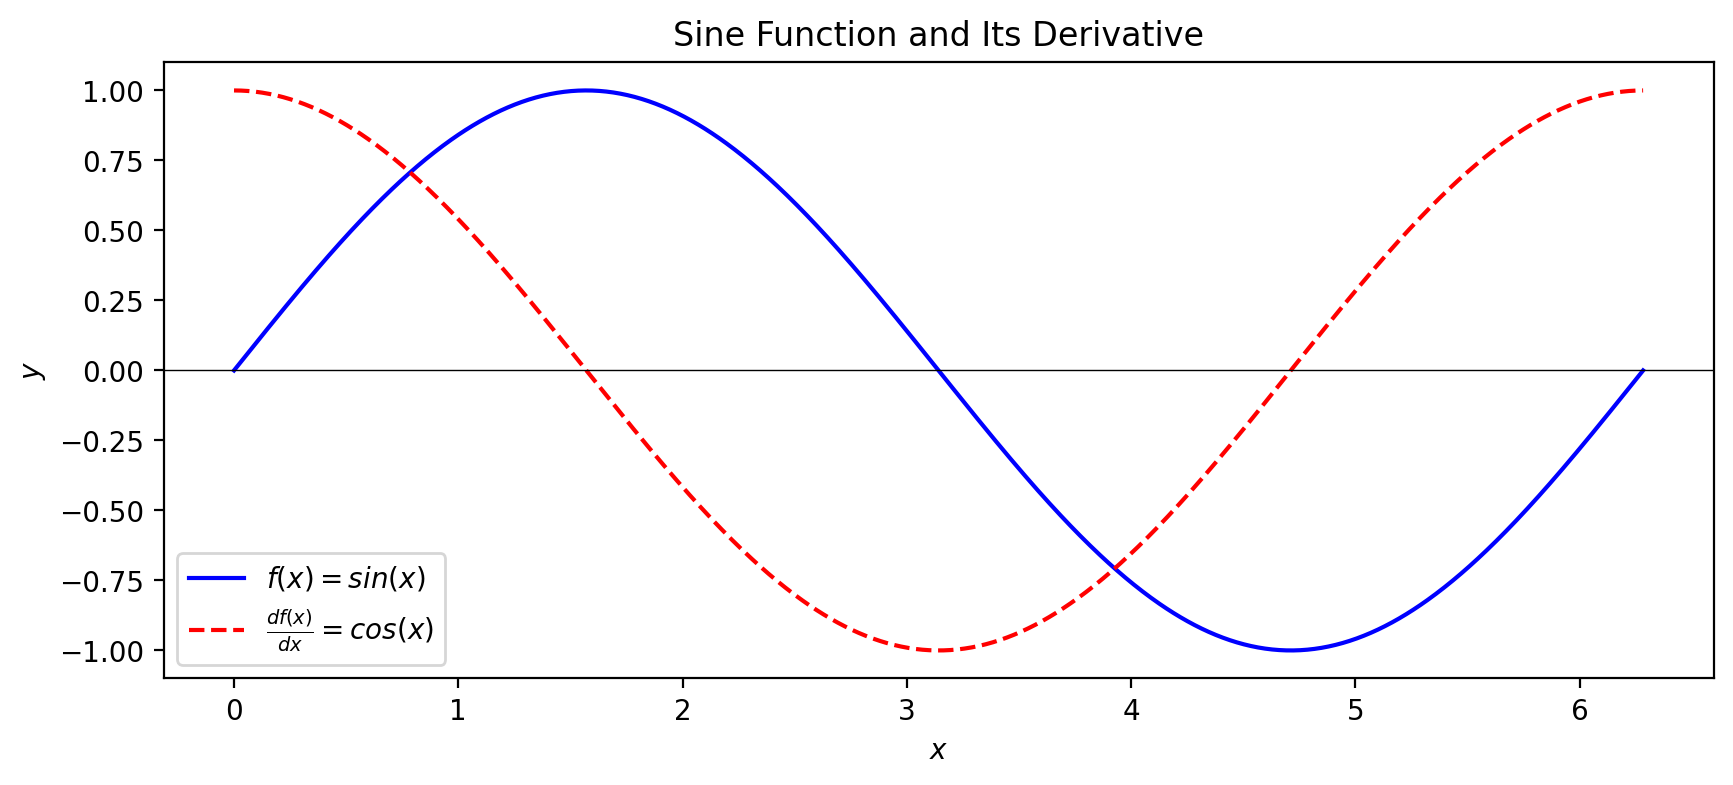

In [2]:
x = sp.Symbol("x")
sin_x = sp.sin(x)
derivative_sin_x = sp.diff(sin_x, x)

f_sin = sp.lambdify(x, sin_x, "numpy")
f_derivative_sin = sp.lambdify(x, derivative_sin_x, "numpy")

x_vals = np.linspace(0, 2 * np.pi, 1000)

plt.figure(figsize=(10, 4), dpi=200)

plt.plot(x_vals, f_sin(x_vals), label=fr"$f(x) = {sin_x}$", color="blue")
plt.plot(x_vals, f_derivative_sin(x_vals), label=fr"$\frac{{df(x)}}{{dx}} = {derivative_sin_x}$", linestyle="--", color="red")
plt.axhline(0, color="black",linewidth=0.5)
plt.title("Sine Function and Its Derivative")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.grid(False)

plt.show()

# Integral of the sine function between phi/2 and phi

In [3]:
x = sp.Symbol("x")
sin_x = sp.sin(x)

result = sp.integrate(sin_x, (x, sp.pi / 2, sp.pi))
result

1

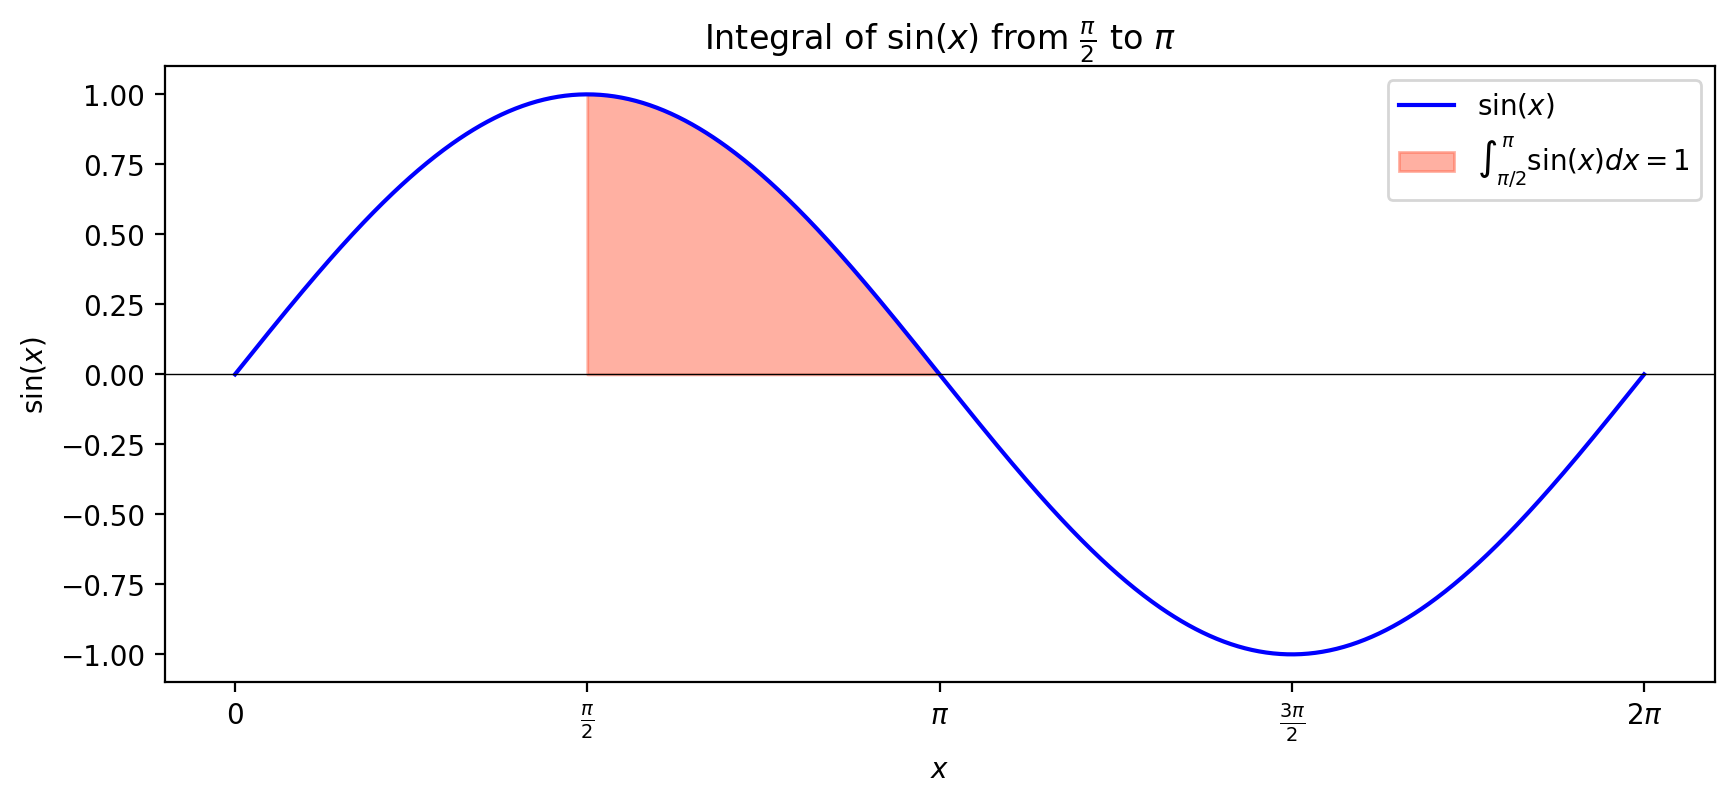

In [4]:
x = sp.Symbol("x")
sin_x = sp.sin(x)
f_sin = sp.lambdify(x, sin_x, "numpy")

x_vals = np.linspace(0, 2 * np.pi, 1000)
y_vals = f_sin(x_vals)

plt.figure(figsize=(10, 4), dpi=200)
plt.plot(x_vals, y_vals, label=r"$\sin(x)$", color="blue")

x_fill = np.linspace(np.pi / 2, np.pi, 1000)
y_fill = np.sin(x_fill)
plt.fill_between(x_fill, y_fill, color="tomato", alpha=0.5, label=fr"$\int_{{\pi/2}}^{{\pi}} \sin(x) dx = {result}$")

plt.title(r"Integral of $\sin(x)$ from $\frac{\pi}{2}$ to $\pi$")
plt.xlabel(r"$x$")
plt.ylabel(r"$\sin(x)$")
plt.axhline(0, color="black",linewidth=0.5)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
plt.legend()

plt.show()

## Experiment: Make a function

In [5]:
# def plot_function_and_integral(func_str, lower_bound, upper_bound):
#     x = sp.Symbol("x")
#     func = sp.sympify(func_str)
    
#     lower_bound = sp.sympify(lower_bound).evalf()
#     upper_bound = sp.sympify(upper_bound).evalf()
    
#     f_lambda = sp.lambdify(x, func, "numpy")
    
#     integral = sp.integrate(func, (x, lower_bound, upper_bound))
#     result = float(integral.evalf())
    
#     x_min = float(min(lower_bound, 0))
#     x_max = float(max(upper_bound, 2 * np.pi))
#     x_range = x_max - x_min
    
#     x_vals = np.linspace(x_min - 0.1 * x_range, x_max + 0.1 * x_range, 1000)
#     y_vals = f_lambda(x_vals)
    
#     plt.figure(figsize=(10, 4), dpi=200)
#     plt.plot(x_vals, y_vals, label=f"${sp.latex(func)}$", color="blue")
    
#     x_fill = np.linspace(float(lower_bound), float(upper_bound), 1000)
#     y_fill = f_lambda(x_fill)
#     plt.fill_between(
#         x_fill,
#         y_fill,
#         color="tomato",
#         alpha=0.5, 
#         label=f"$\\int_{{{sp.latex(lower_bound)}}}^{{{sp.latex(upper_bound)}}} {sp.latex(func)} dx = {result:.4f}$"
#     )
    
#     plt.title(f"Integral of ${sp.latex(func)}$ from ${sp.latex(lower_bound)}$ to ${sp.latex(upper_bound)}$")
#     plt.xlabel("$x$")
#     plt.ylabel(f"${sp.latex(func)}$")
#     plt.axhline(0, color="black", linewidth=0.5)
    
#     plt.legend(loc="center", bbox_to_anchor=(0.5, -0.25), ncols=2)
#     plt.show()

In [6]:
def plot_function_and_integral(func_str, lower_bound, upper_bound):
    x = sp.Symbol("x")
    
    func = sp.sympify(func_str)
    lower_bound = sp.sympify(lower_bound).evalf()
    upper_bound = sp.sympify(upper_bound).evalf()
    
    f_lambda = sp.lambdify(x, func, "numpy")
    
    integral = sp.integrate(func, (x, lower_bound, upper_bound))
    result = float(integral.evalf())

    # x_min = float(min(lower_bound, -5))
    # x_max = float(max(upper_bound, 5))
    x_min = float(min(lower_bound, 0))
    x_max = float(max(upper_bound, 2 * np.pi))
    x_range = x_max - x_min
    
    x_vals = np.linspace(x_min - 0.1 * x_range, x_max + 0.1 * x_range, 1000)
    
    try:
        y_vals = f_lambda(x_vals)
    except ValueError:
        y_vals = np.zeros_like(x_vals)
    
    plt.figure(figsize=(10, 4), dpi=200)
    plt.plot(x_vals, y_vals, label=f"${sp.latex(func)}$", color="blue")
    
    x_fill = np.linspace(float(lower_bound), float(upper_bound), 1000)
    y_fill = f_lambda(x_fill)
    plt.fill_between(
        x_fill,
        y_fill,
        color="tomato",
        alpha=0.5, 
        label=f"$\\int_{{{sp.latex(lower_bound)}}}^{{{sp.latex(upper_bound)}}} {sp.latex(func)} dx = {result}$"
    )
    
    plt.title(f"Integral of ${sp.latex(func)}$ from ${sp.latex(lower_bound)}$ to ${sp.latex(upper_bound)}$")
    plt.xlabel("$x$")
    plt.ylabel(f"${sp.latex(func)}$")
    plt.axhline(0, color="black", linewidth=0.5)
    plt.axvline(0, color="black", linewidth=0.5)
    
    plt.legend(loc="center", bbox_to_anchor=(0.5, -0.25), ncols=2)
    plt.show()

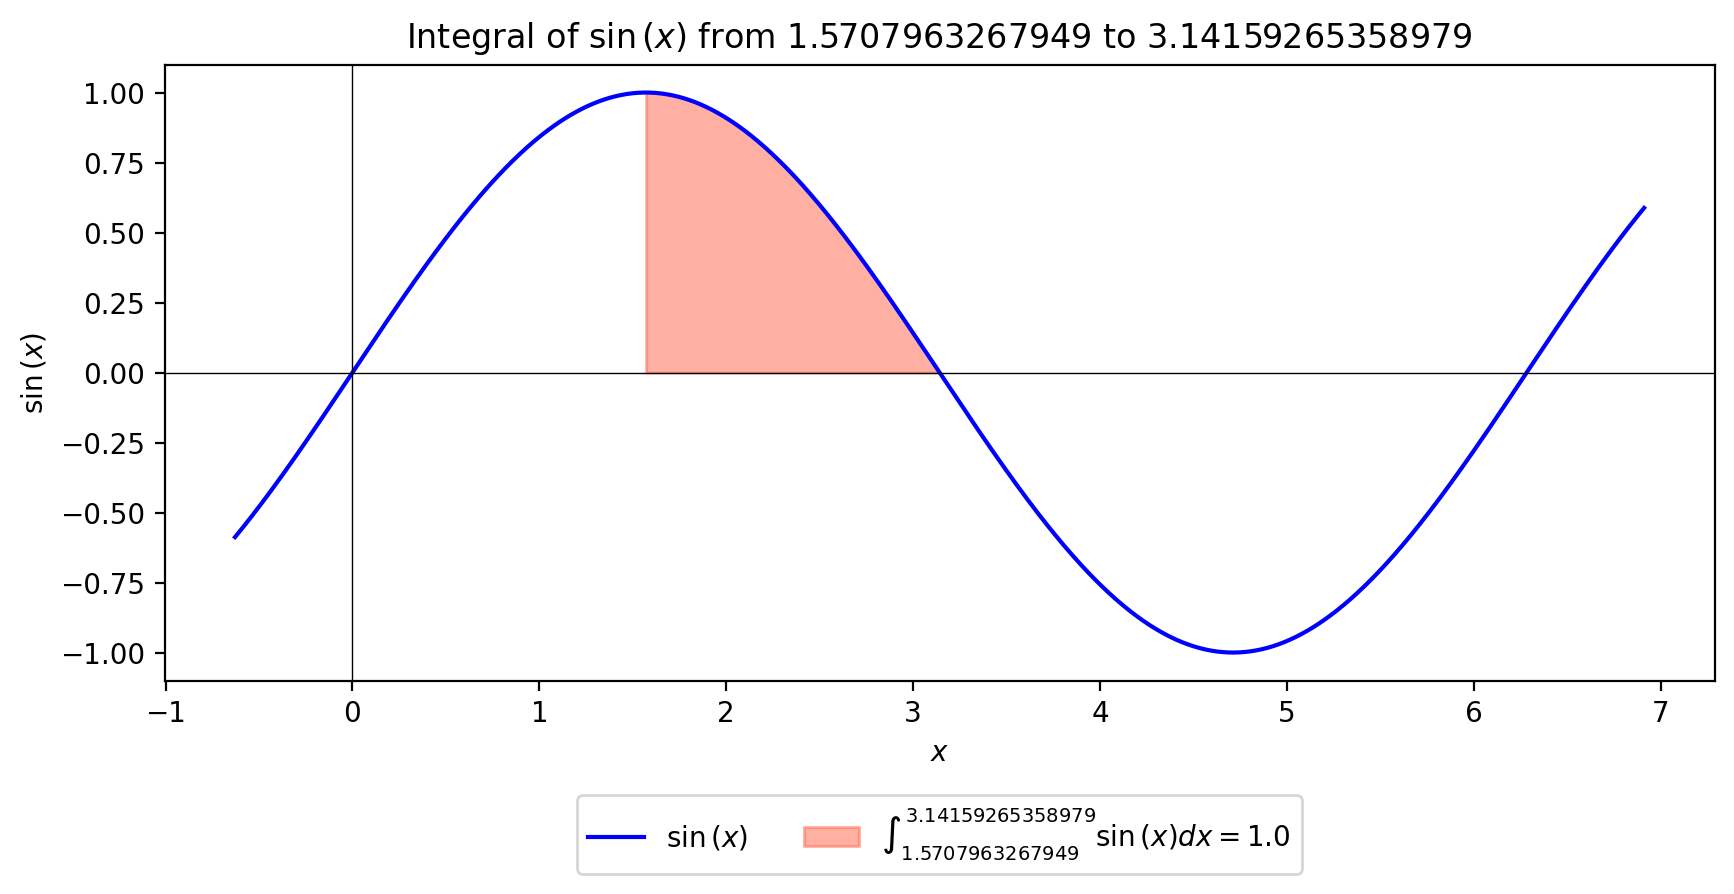

In [7]:
plot_function_and_integral("sin(x)", "pi/2", "pi")

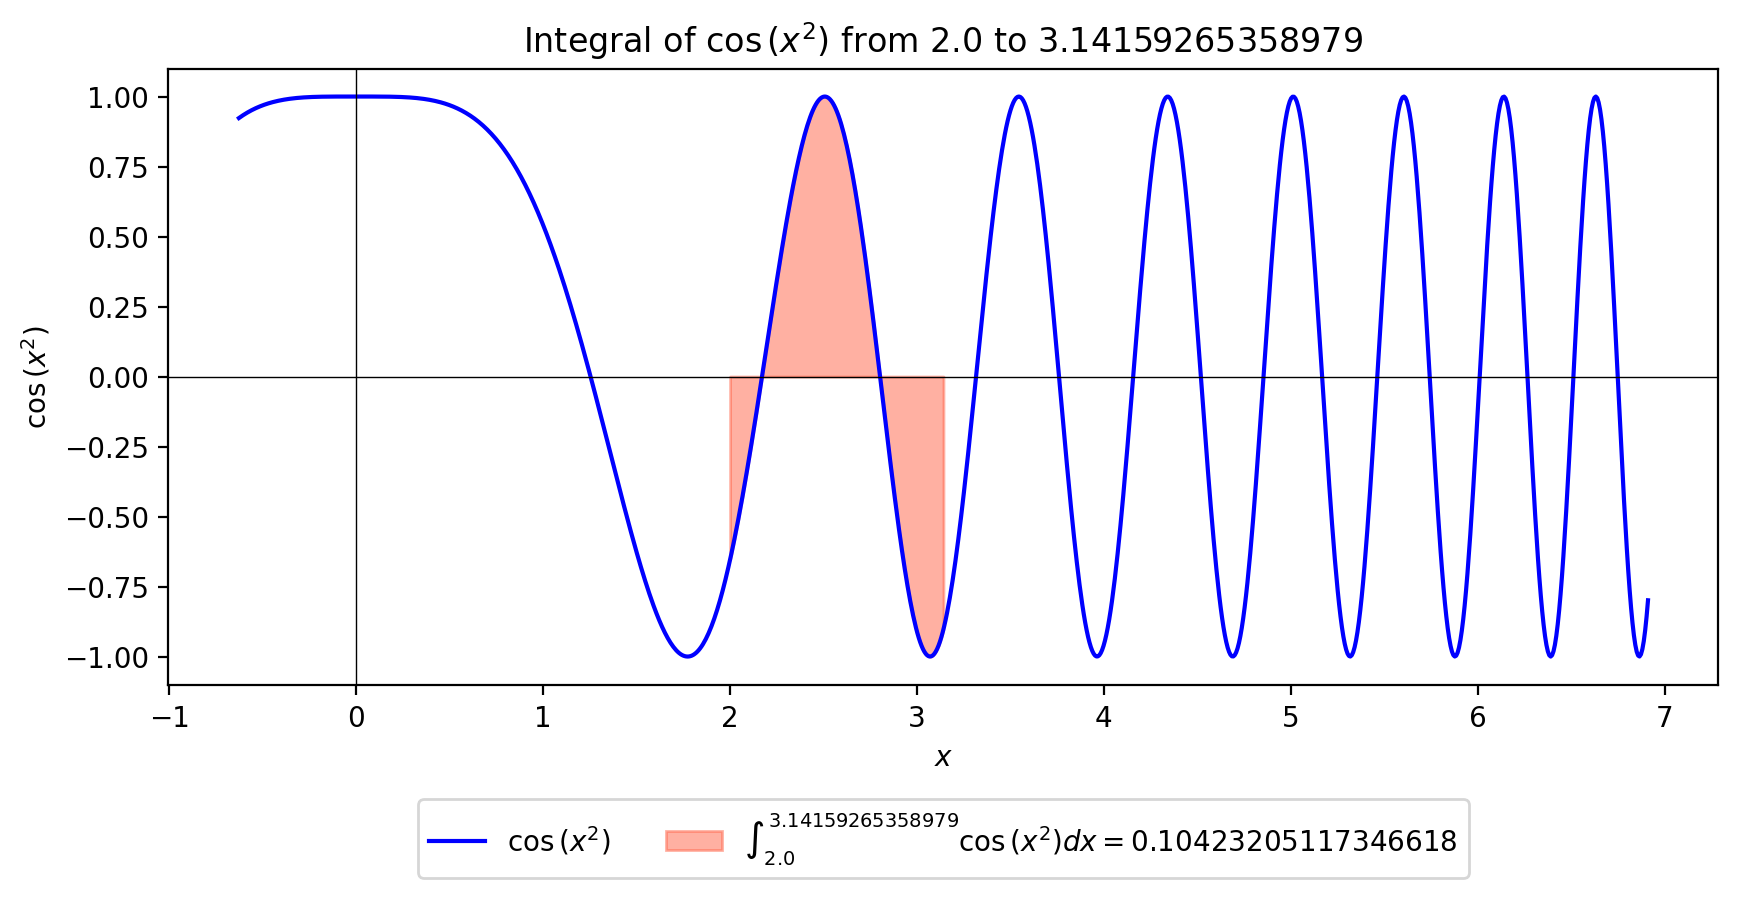

In [8]:
plot_function_and_integral("cos(x**2)", "2", "pi")

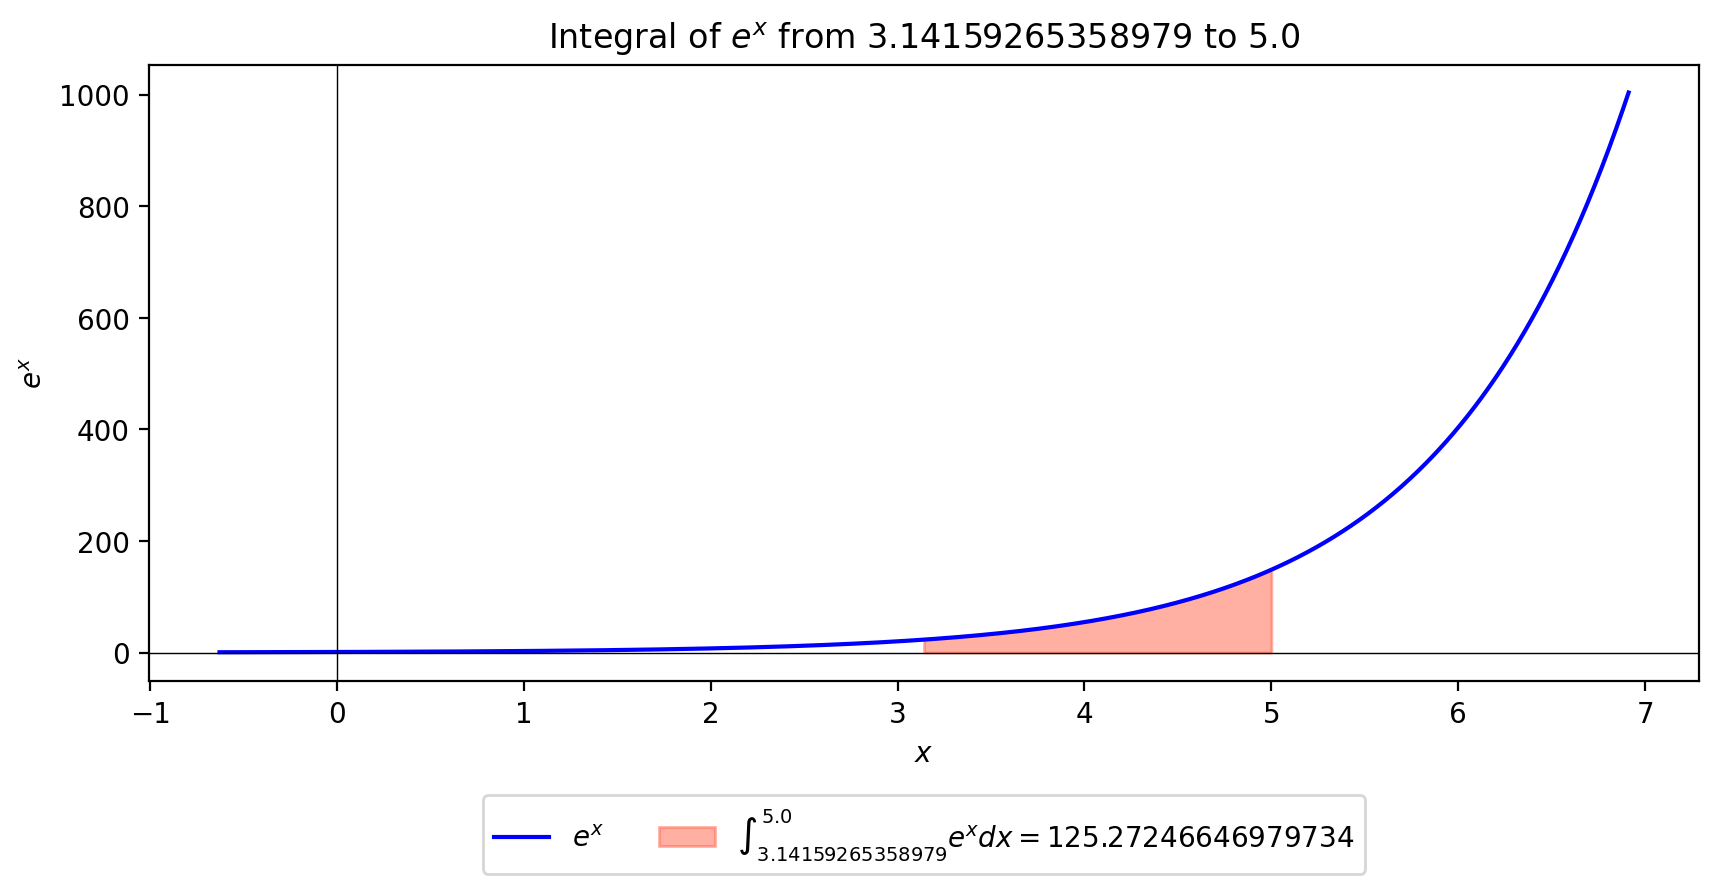

In [9]:
plot_function_and_integral("exp(x)", np.pi, 5)

<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in log
  return log(x) + 2


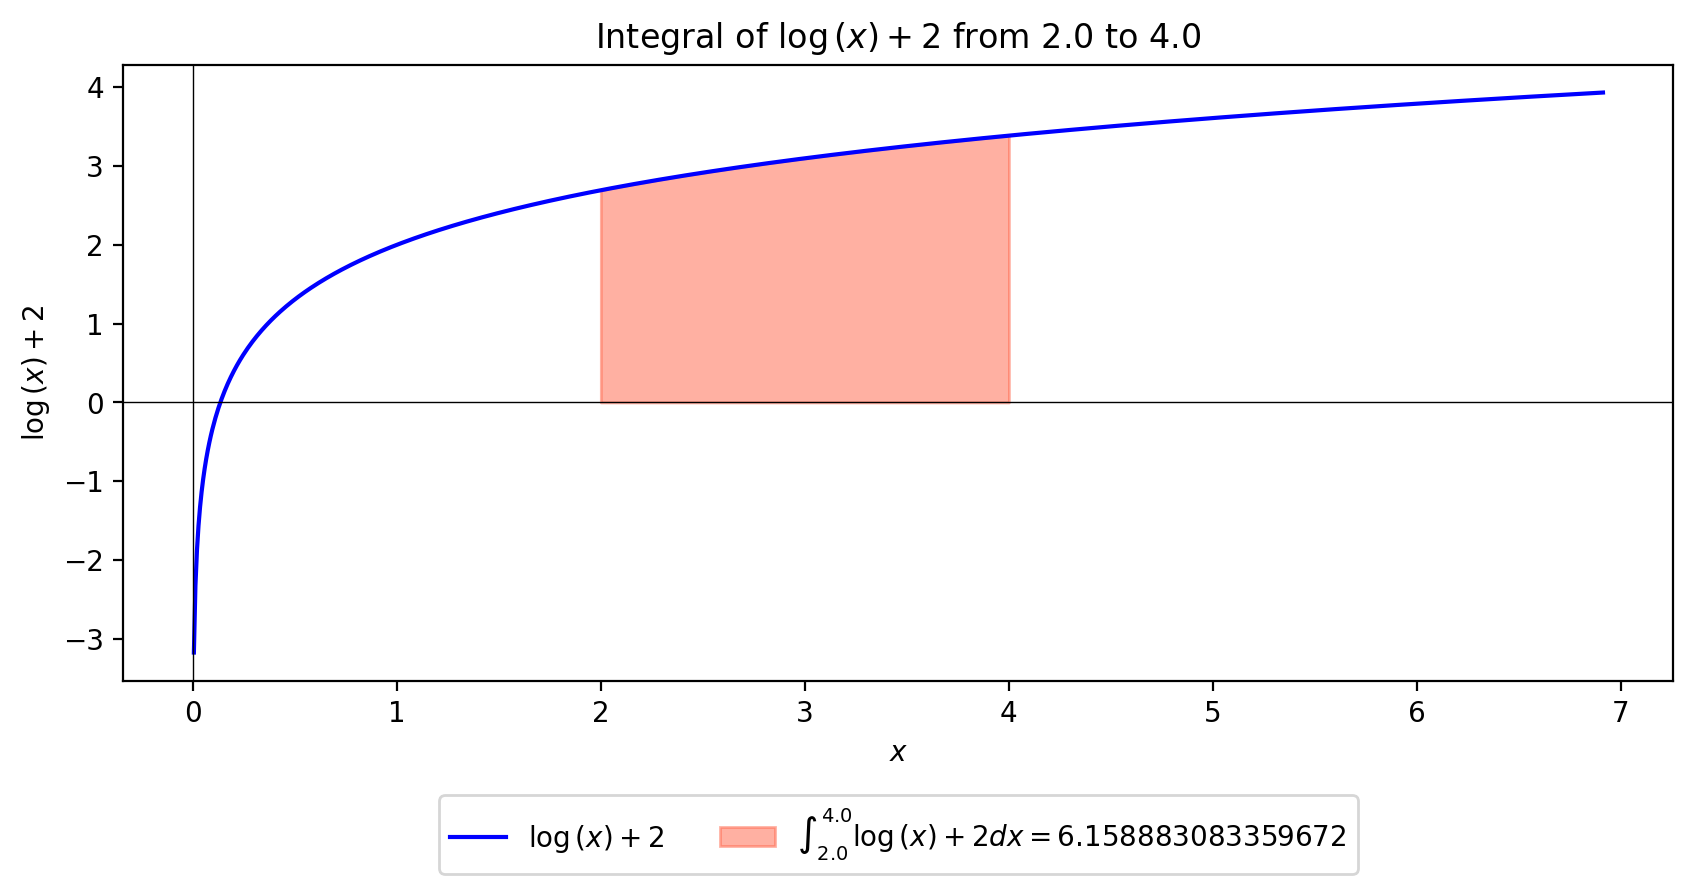

In [10]:
plot_function_and_integral("log(x) + 2", 2, 4)

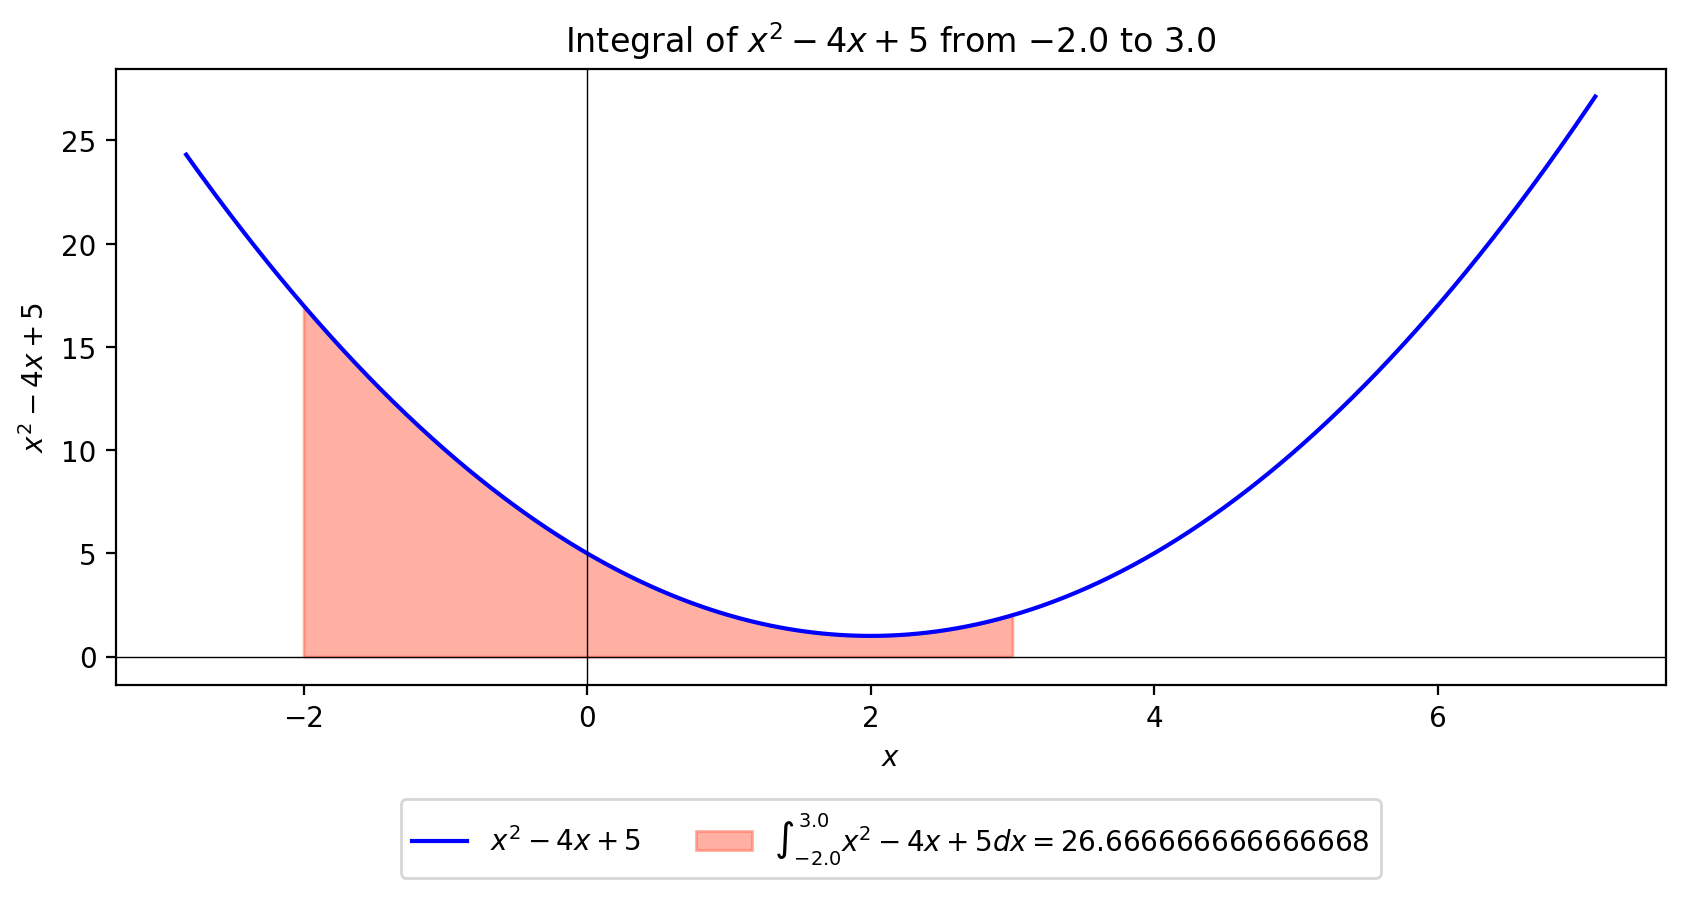

In [11]:
plot_function_and_integral("x**2 - 4*x + 5", -2, 3)

# Maximum of the sine function

In [12]:
x = sp.Symbol("x")
sin_x = sp.sin(x)
derivative_sin_x = sp.diff(sin_x, x)

critical_points = sp.solve(derivative_sin_x, x)
print(f"Critical points: {critical_points}")

critical_values = []
for point in critical_points:
    value = sin_x.subs(x, point)
    critical_values.append(value)
    print(f"sin(x) at x = {point} is {value}")

Critical points: [pi/2, 3*pi/2]
sin(x) at x = pi/2 is 1
sin(x) at x = 3*pi/2 is -1


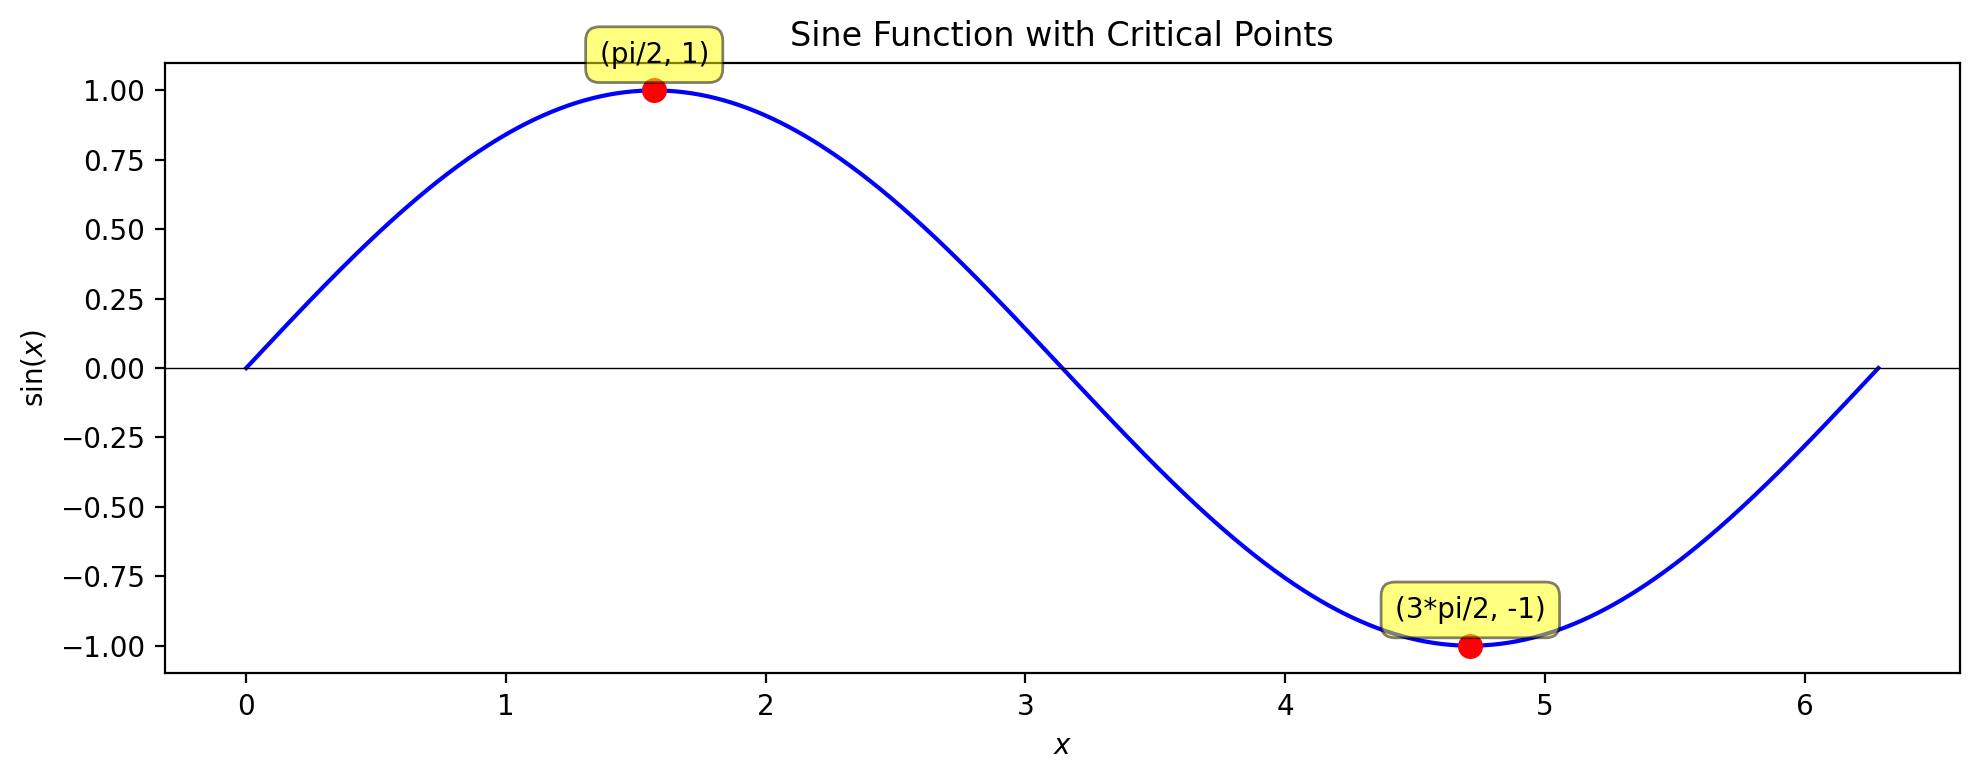

In [13]:
f_sin = sp.lambdify(x, sin_x, "numpy")

x_vals = np.linspace(0, 2 * np.pi, 1000)
y_vals = f_sin(x_vals)

plt.figure(figsize=(10, 4), dpi=200)
plt.plot(x_vals, y_vals, color="blue", label="sin(x)")

plt.axhline(0, color="black", linewidth=0.5)

for point, value in zip(critical_points, critical_values):
    plt.plot(float(point), float(value), "ro", markersize=8)
    plt.annotate(
        f"({point}, {value})", 
        xy=(float(point), float(value) + 0.1), 
        ha="center",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5)
    )

plt.title("Sine Function with Critical Points")
plt.xlabel(r"$x$")
plt.ylabel(r"$\sin(x)$")

plt.tight_layout()
plt.show()